In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import patsy

from statsmodels.api import Logit, OLS

from joblib import Parallel, delayed
from sklearn import gaussian_process

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
sns.set_style("ticks")

In [19]:
ndims = 1
ninstances = 100
X = np.random.randn(ninstances,ndims)
w = np.random.rand(ndims)*3
b = 1.5
y = np.dot(X,w) + np.dot(X**2,np.random.rand(ndims)*(-2)) + np.dot(np.sin(X),np.random.rand(ndims)*(10)) + b*np.random.randn(ninstances)
print X.shape, y.shape, w.shape, b

(100, 1) (100,) (1,) 1.5


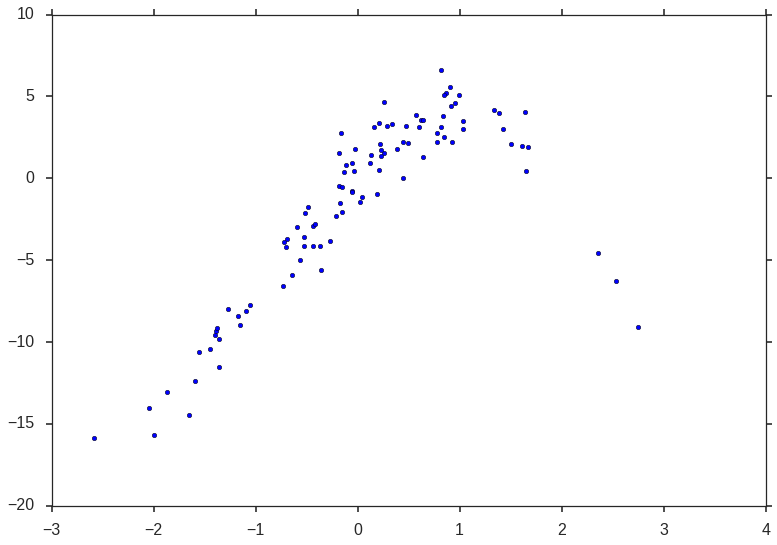

In [20]:
plt.scatter(X[:,0], y)

In [35]:
model = gaussian_process.GaussianProcess(theta0=1e-1,
                     thetaL=1e-3, thetaU=1,
                     random_start=100)
model.fit(X,y)

GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x7fa271db6b90>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=100,
        random_state=<mtrand.RandomState object at 0x7fa298890820>,
        regr=<function constant at 0x7fa271db67d0>, storage_mode='full',
        theta0=array([[ 0.1]]), thetaL=array([[ 0.001]]),
        thetaU=array([[1]]), verbose=False)

In [36]:
x = np.linspace(X.min(), X.max(), 1000)[: , np.newaxis]
y_pred, sigma2_pred = model.predict(x, eval_MSE=True)

In [37]:
sigma = np.sqrt(sigma2_pred)

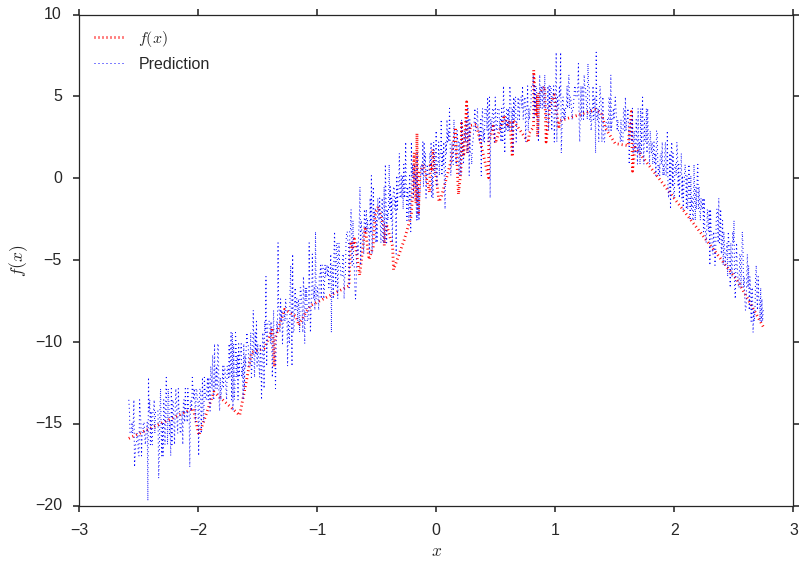

In [39]:
fig = plt.figure()
idx = np.argsort(X[:, 0])
plt.plot(X[idx, 0], y[idx], 'r:', label=u'$f(x)$')
#plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x[:, 0], y_pred, 'b:', label=u'Prediction', lw=1)
"""
plt.fill(np.concatenate([x[:, 0], x[::-1, 0]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                       (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
"""
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()